# Stock prices

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import requests
from datetime import datetime, timedelta

In [8]:
API_KEY = "oJ2UVKJR6Hglt3oZuUb0zxWef0pjxsdp"

In [13]:
def fix_datetime_on_dataframe(df):
    # Convert the 't' column (which contains timestamps in milliseconds since Unix epoch)
    # into datetime objects and store the result in a new column called 'date'
    df['date'] = pd.to_datetime(df['t'], origin='unix', unit='ms')
    
    # Set the new 'date' column as the index of the DataFrame,
    # and drop the original 't' column since it's no longer needed
    return df.set_index(keys='date').drop(columns='t')

In [14]:
def fix_column_names_on_dataframe(df):
    mapping = {
        'o': 'open',
        'c': 'close',
        'h': 'high',
        'l': 'low',
        'n': 'number',
        'v': 'volume',
        'vw': 'avg_price'
    }
    return df.rename(columns=mapping)

In [15]:
def create_stock_df_of_company(company_code):
    company_code = company_code.upper()

    start_date = datetime.today() - timedelta(days=91)
    end_date = datetime.today() - timedelta(days=1)
    start = datetime.strftime(start_date, "%Y-%m-%d")
    end = datetime.strftime(end_date, "%Y-%m-%d")

    url = f"https://api.polygon.io/v2/aggs/ticker/{company_code}/range/1/day/{start}/{end}?apiKey={API_KEY}"

    api_data = requests.get(url).json()

    df = pd.DataFrame(api_data['results'])

    df = fix_datetime_on_dataframe(df)
    df = fix_column_names_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [16]:
apple_df = create_stock_df_of_company('AAPL')
apple_df.head()

,volume,avg_price,open,close,high,low,number,company_code
date,,,,,,,,
2025-04-09 04:00:00,184261774.0,187.9565,171.950,198.85,200.6100,171.8900,2212956,AAPL
2025-04-10 04:00:00,121879981.0,189.9820,189.065,190.42,194.7799,183.0000,1500041,AAPL
2025-04-11 04:00:00,87435915.0,195.6230,186.100,198.15,199.5400,186.0600,1073191,AAPL
2025-04-14 04:00:00,101352911.0,205.5914,211.440,202.52,212.9400,201.1621,1272714,AAPL
2025-04-15 04:00:00,51343872.0,202.1396,201.855,202.14,203.5100,199.8000,595846,AAPL


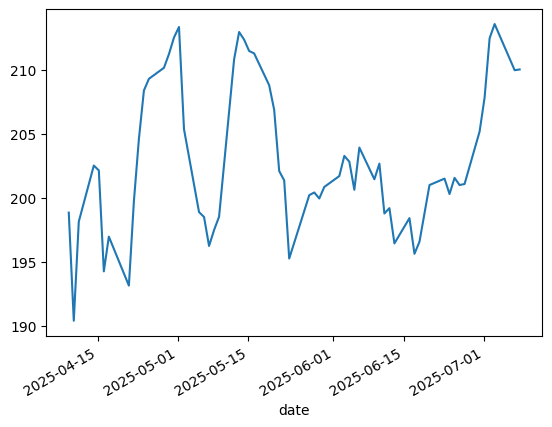

In [17]:
apple_df['close'].plot(kind='line');

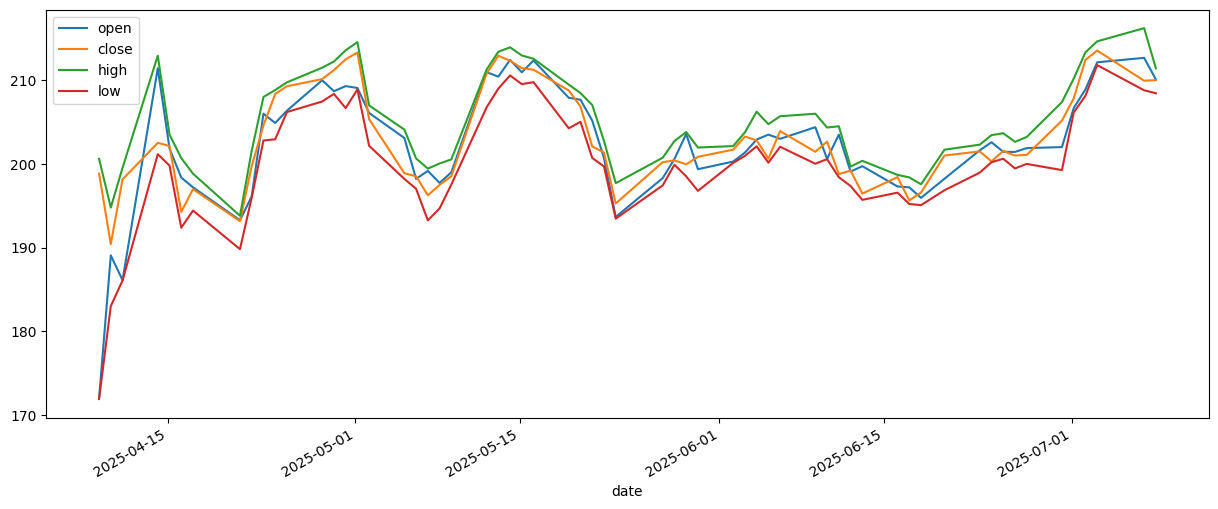

In [18]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6));

## Now check your result!

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-8.3.4, pluggy-1.5.0 -- /Users/bouchrakostet/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/bouchrakostet/code/lewagon/02-Data-Toolkit/02-Data-Sourcing/data-stock-market-api/tests
plugins: asyncio-0.19.0, anyio-4.8.0, typeguard-4.4.2
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.74s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [47]:
# Set default figsize for all notebook (usefull in TS analysis)
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [48]:
# We build a list of DataFrames — one for Apple, and then others (Amazon, Google, Meta) 
# by calling create_stock_df_of_company(code) for each.

# List of stock ticker symbols for different companies
codes = ['AMZN', 'GOOGL', 'META']  

# Start the list with the DataFrame for Apple
stock_dfs = [apple_df]

# Loop through each stock code in the list
for code in codes:
    # Call a function that returns a DataFrame for the given company, and add it to the list
    stock_dfs.append(create_stock_df_of_company(code))
    

In [49]:
# Combine all individual stock DataFrames into one big DataFrame
# concatenating them on top of each others
stocks_df = pd.concat(stock_dfs)

# Display the first 5 rows of the combined DataFrame to inspect the result
stocks_df.head()

,volume,avg_price,open,close,high,low,number,company_code
date,,,,,,,,
2025-04-09 04:00:00,184261774.0,187.9565,171.950,198.85,200.6100,171.8900,2212956,AAPL
2025-04-10 04:00:00,121879981.0,189.9820,189.065,190.42,194.7799,183.0000,1500041,AAPL
2025-04-11 04:00:00,87435915.0,195.6230,186.100,198.15,199.5400,186.0600,1073191,AAPL
2025-04-14 04:00:00,101352911.0,205.5914,211.440,202.52,212.9400,201.1621,1272714,AAPL
2025-04-15 04:00:00,51343872.0,202.1396,201.855,202.14,203.5100,199.8000,595846,AAPL


In [42]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df

company_code,AAPL,AMZN,GOOGL,META
date,,,,
2025-04-09 04:00:00,198.85,191.10,158.71,585.77
2025-04-10 04:00:00,190.42,181.22,152.82,546.29
2025-04-11 04:00:00,198.15,184.87,157.14,543.57
2025-04-14 04:00:00,202.52,182.12,159.07,531.48
2025-04-15 04:00:00,202.14,179.59,156.31,521.52
...,...,...,...,...
2025-07-01 04:00:00,207.82,220.46,175.84,719.22
2025-07-02 04:00:00,212.44,219.92,178.64,713.57
2025-07-03 04:00:00,213.55,223.41,179.53,719.01


<Axes: xlabel='date'>

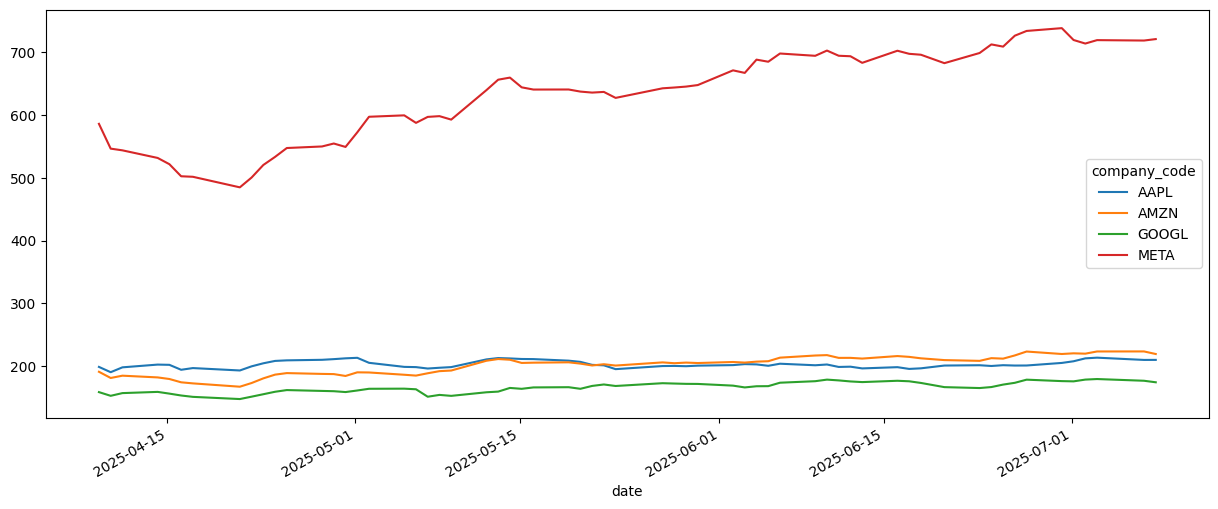

In [43]:
pivot_df.plot(kind='line')

In [45]:
def normalize(series):
    # Normalize the series so it starts at 1:
    # Each value is divided by the first value in the series.
    # This shows relative change (e.g. 1.1 = 10% increase, 0.9 = 10% decrease).
    return series / series[0]

# Apply the normalize function to each column in pivot_df
# axis=0 means we apply it column-wise (each column is treated as a Series)
# This allows us to compare trends across companies regardless of their original scale
normalized_pivot = pivot_df.apply(normalize, axis=0)


/var/folders/ct/twywmwss0xbd4_nt_tm29mv80000gn/T/ipykernel_51956/634327273.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return series / series[0]


<Axes: xlabel='date'>

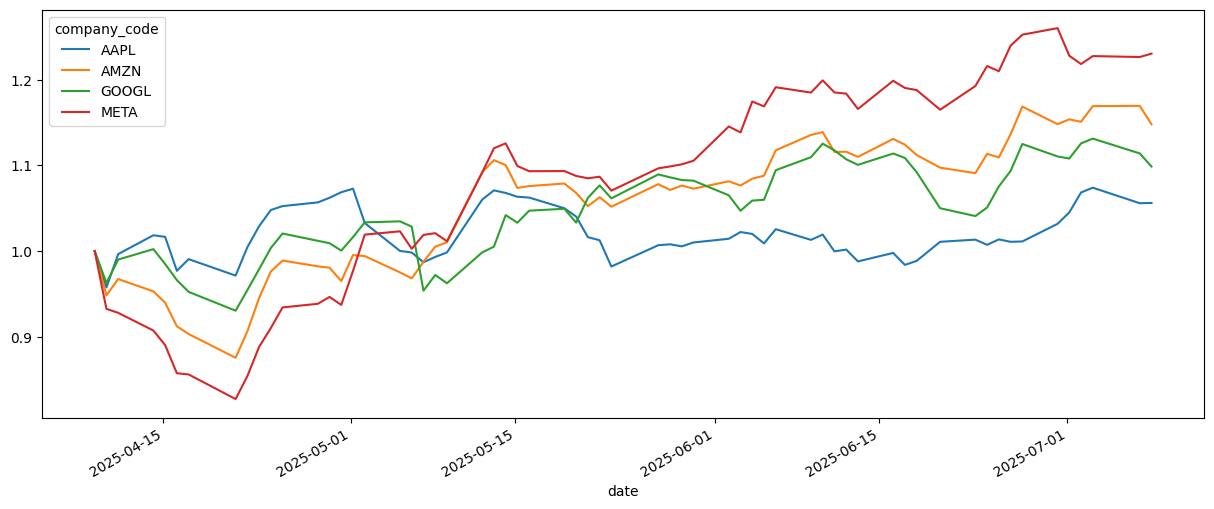

In [46]:
normalized_pivot.plot(kind='line')